# Classification Supervised Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/Heart_disease.csv',index_col=0)

In [3]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
df['ChestPain'].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [9]:
df['ChestPain'].value_counts()

asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [10]:
df.shape

(303, 14)

In [11]:
df.isnull()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False
302,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [18]:
df.shape

(297, 14)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
lbc = LabelEncoder()

In [22]:
y = lbc.fit_transform(df['AHD'])
y[:5]

array([0, 1, 1, 0, 0])

In [23]:
df['ChestPain'] = lbc.fit_transform(df['ChestPain'])
df['Thal'] = lbc.fit_transform(df['Thal'])

In [24]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,No
2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,Yes
3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,Yes
4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,No
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,No


In [26]:
x=df.drop('AHD',axis='columns')

In [27]:
x.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0
2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1
3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2
4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1


In [28]:
from sklearn.model_selection import train_test_split

In [40]:
xtr,xtt,ytr,ytt = train_test_split(x,y,test_size=0.30,random_state=42)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
model = KNeighborsClassifier(n_neighbors=3)

In [43]:
model.fit(xtr,ytr)

KNeighborsClassifier(n_neighbors=3)

In [44]:
ytr[0]

1

In [47]:
xtr[:1].values

array([[ 61. ,   1. ,   0. , 140. , 207. ,   0. ,   2. , 138. ,   1. ,
          1.9,   1. ,   1. ,   2. ]])

In [48]:
model.predict(xtr[:1].values)

array([1])

In [49]:
pred = model.predict(xtt)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score

In [51]:
confusion_matrix(ytt, pred)

array([[35, 14],
       [15, 26]], dtype=int64)

In [52]:
accuracy_score(ytt,pred)*100

67.77777777777779

In [56]:
precision_score(ytt,pred)

0.65

In [58]:
acc=[]
for k in range(3,15,2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(xtr,ytr)
    pred = model.predict(xtt)
    from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
    print(confusion_matrix(ytt,pred))
    acc.append(accuracy_score(ytt,pred))
    precision_score(ytt,pred)
    

[[35 14]
 [15 26]]
[[37 12]
 [16 25]]
[[36 13]
 [18 23]]
[[38 11]
 [21 20]]
[[38 11]
 [18 23]]
[[37 12]
 [18 23]]


In [59]:
acc

[0.6777777777777778,
 0.6888888888888889,
 0.6555555555555556,
 0.6444444444444445,
 0.6777777777777778,
 0.6666666666666666]

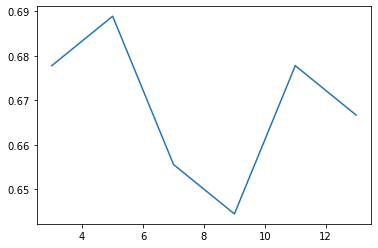

In [60]:
plt.plot(range(3,15,2),acc)